In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle
from random import sample

from utils import *

In [47]:
#selected subset of dates. 
val_dates = ['180327','180329']
test_dates = ['180330','180331']
bad_dates = ['180326', '180328', '171019', '180715', '180716', '180717']
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/'
model_saving_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models'
CH = 23

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files,load_path, batch_size=256, CH = CH)

In [48]:
len(train_loader), len(val_loader), len(test_loader)

(78, 25, 25)

In [50]:
## Check balance
count_sleep = 0
count_move = 0
for t in range(len(val_files)):
    if 'sleep' in val_files[t][0]:
        count_sleep+=1
    if 'move' in val_files[t][0]:
        count_move +=1 
print(count_sleep, count_move)

4937 1347


In [51]:
# Balance Validation Dataset
sleep_files = []
move_files = []
for t in range(len(val_files)):
    if 'sleep' in val_files[t][0]:
        sleep_files.append(val_files[t])
    if 'move' in val_files[t][0]:
        move_files.append(val_files[t])

sleep_sample = sample(sleep_files, len(move_files))
val_2_files = sleep_sample+move_files
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_2_files, test_files,load_path, batch_size=256,CH = CH)

## Check balance
count_sleep = 0
count_move = 0
for t in range(len(val_2_files)):
    if 'sleep' in val_2_files[t][0]:
        count_sleep+=1
    if 'move' in val_2_files[t][0]:
        count_move +=1 
print(count_sleep, count_move)


1347 1347


In [44]:
len(train_loader), len(val_loader), len(test_loader)

(78, 11, 25)

In [19]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([256, 1, 100, 10])
torch.Size([256, 1])
256
256
256


date:180401, rec:001, time:3816.0


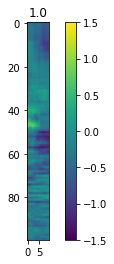

date:180324, rec:004, time:5209.0


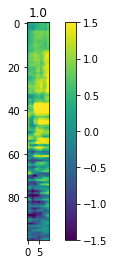

date:180323, rec:007, time:4722.0


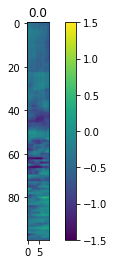

date:180325, rec:004, time:5386.0


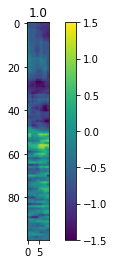

date:180322, rec:002, time:6381.0


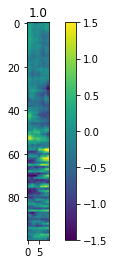

date:180324, rec:008, time:1441.0


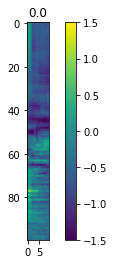

date:180325, rec:005, time:6143.0


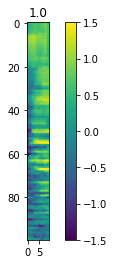

date:180325, rec:001, time:2881.0


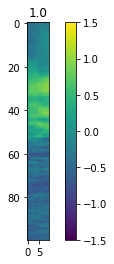

date:180323, rec:004, time:6244.0


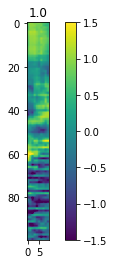

date:180325, rec:002, time:1030.0


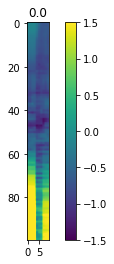

date:180324, rec:008, time:2788.0


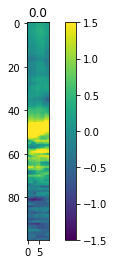

date:180324, rec:004, time:5309.0


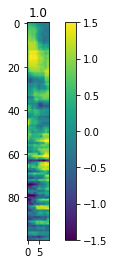

date:180324, rec:004, time:1939.0


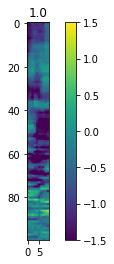

date:180325, rec:009, time:930.0


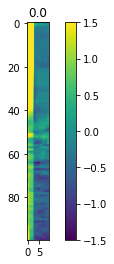

date:180324, rec:004, time:5259.0


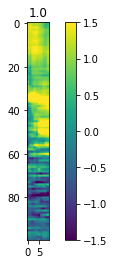

date:180401, rec:001, time:5993.0


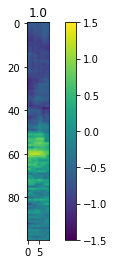

date:180401, rec:001, time:6013.0


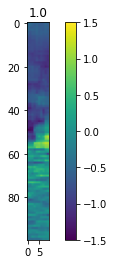

date:180324, rec:004, time:6602.0


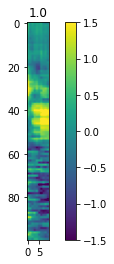

date:180324, rec:003, time:5888.0


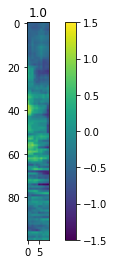

date:180401, rec:001, time:6363.0


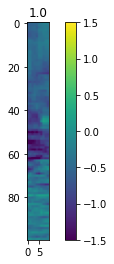

date:180325, rec:006, time:2312.0


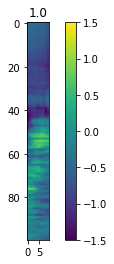

date:180322, rec:007, time:4520.0


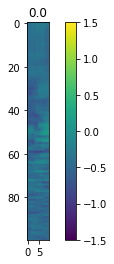

date:180325, rec:003, time:6527.0


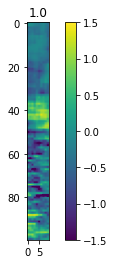

date:180325, rec:001, time:740.0


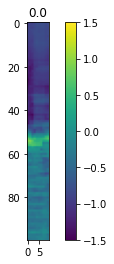

date:180324, rec:009, time:1158.0


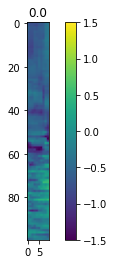

date:180324, rec:009, time:1782.0


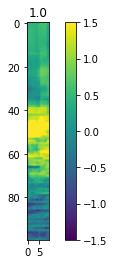

date:180323, rec:004, time:5499.0


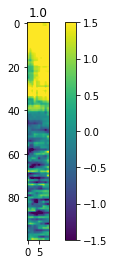

date:180325, rec:009, time:4066.0


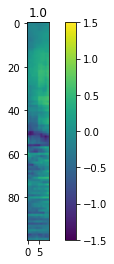

date:180324, rec:008, time:6734.0


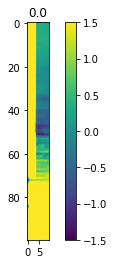

date:180322, rec:007, time:2173.0


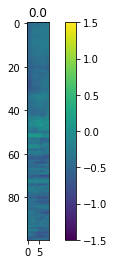

date:180325, rec:001, time:1550.0


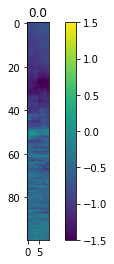

date:180325, rec:007, time:4903.0


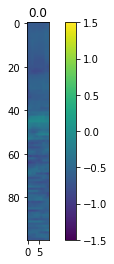

date:180325, rec:009, time:2170.0


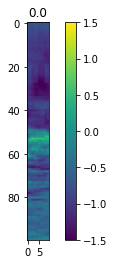

date:180325, rec:002, time:2825.0


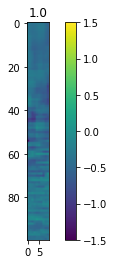

date:180322, rec:003, time:1183.0


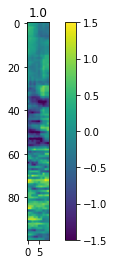

date:180323, rec:004, time:3063.0


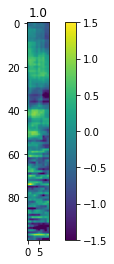

date:180322, rec:007, time:1477.0


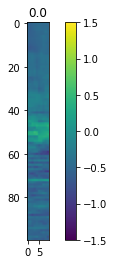

date:180325, rec:001, time:1540.0


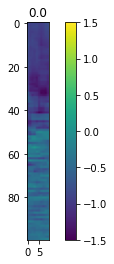

date:180322, rec:007, time:2153.0


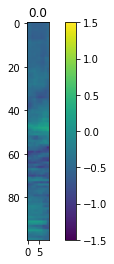

date:180325, rec:003, time:180.0


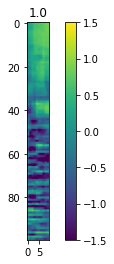

date:180323, rec:007, time:5491.0


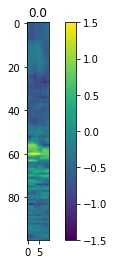

date:180322, rec:005, time:1895.0


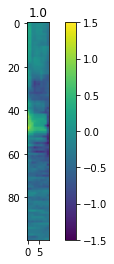

date:180325, rec:006, time:131.0


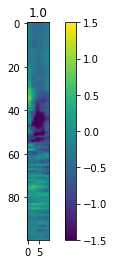

date:180401, rec:001, time:1740.0


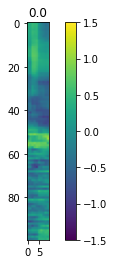

date:180322, rec:007, time:4540.0


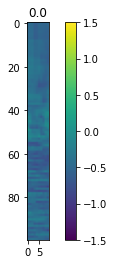

date:180324, rec:001, time:5480.0


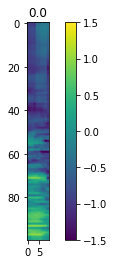

date:180322, rec:007, time:3910.0


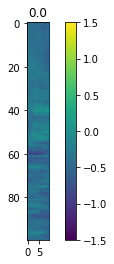

date:180323, rec:004, time:3533.0


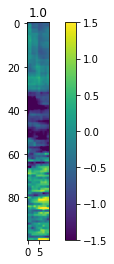

date:180325, rec:004, time:6527.0


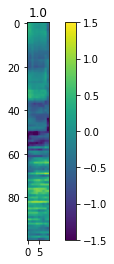

date:180322, rec:007, time:2243.0


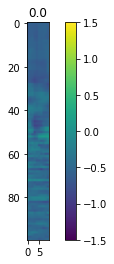

date:180324, rec:008, time:5524.0


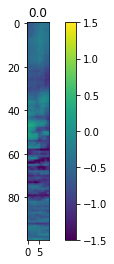

date:180401, rec:001, time:420.0


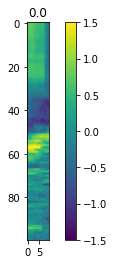

date:180323, rec:005, time:2647.0


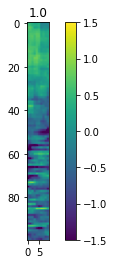

date:180401, rec:001, time:5387.0


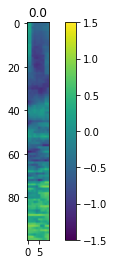

date:180322, rec:001, time:575.0


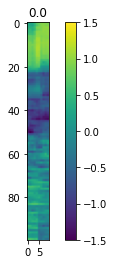

date:180325, rec:007, time:1823.0


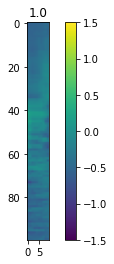

date:180324, rec:008, time:5514.0


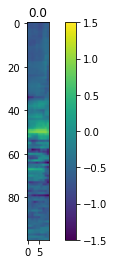

date:180401, rec:001, time:970.0


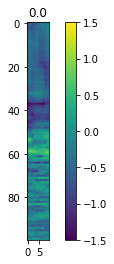

date:180323, rec:007, time:5581.0


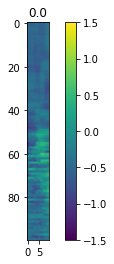

date:180324, rec:001, time:1366.0


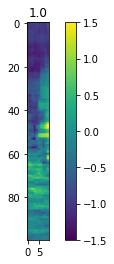

date:180325, rec:006, time:3683.0


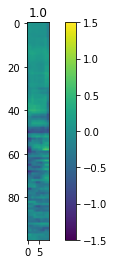

date:180325, rec:009, time:1850.0


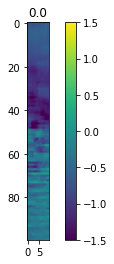

date:180401, rec:002, time:3096.0


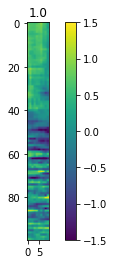

date:180325, rec:007, time:1558.0


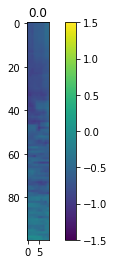

date:180322, rec:005, time:6734.0


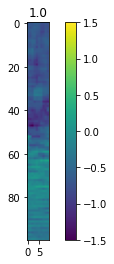

date:180322, rec:007, time:4030.0


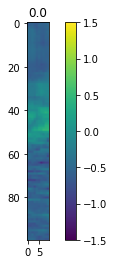

date:180325, rec:009, time:2400.0


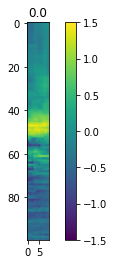

date:180322, rec:001, time:575.0


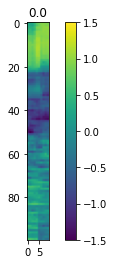

date:180324, rec:008, time:5113.0


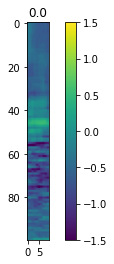

date:180324, rec:001, time:5390.0


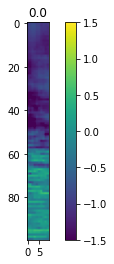

date:180324, rec:009, time:210.0


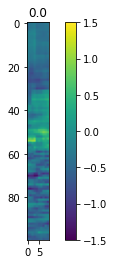

date:180323, rec:002, time:6236.0


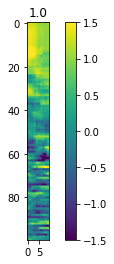

date:180324, rec:008, time:2748.0


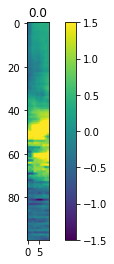

date:180324, rec:006, time:5535.0


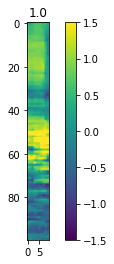

date:180401, rec:001, time:950.0


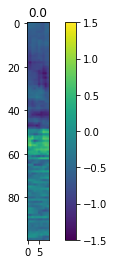

date:180323, rec:002, time:3056.0


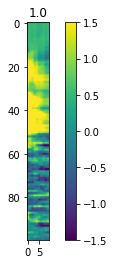

date:180322, rec:001, time:555.0


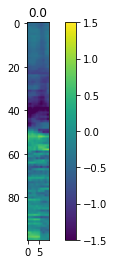

date:180325, rec:002, time:410.0


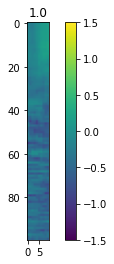

date:180325, rec:001, time:520.0


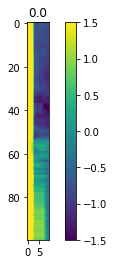

date:180324, rec:009, time:1972.0


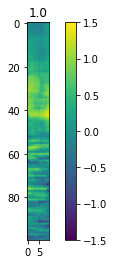

date:180325, rec:002, time:4118.0


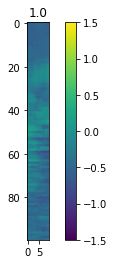

date:180324, rec:008, time:6614.0


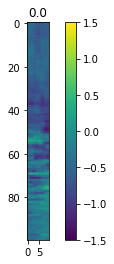

date:180323, rec:002, time:2496.0


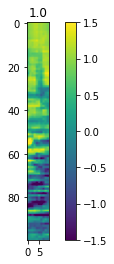

date:180324, rec:004, time:4449.0


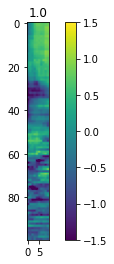

date:180324, rec:001, time:2477.0


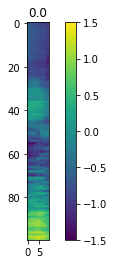

date:180324, rec:008, time:2798.0


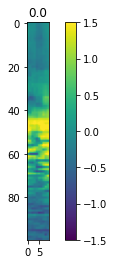

date:180322, rec:007, time:4820.0


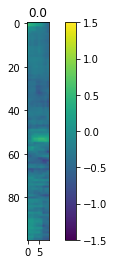

date:180325, rec:009, time:2040.0


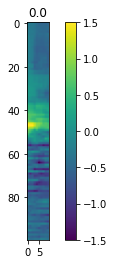

date:180325, rec:001, time:1100.0


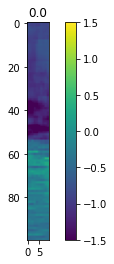

date:180325, rec:001, time:3222.0


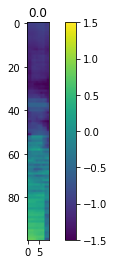

date:180324, rec:008, time:2061.0


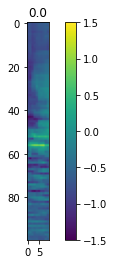

date:180322, rec:003, time:3448.0


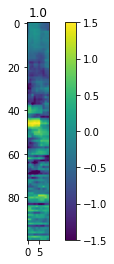

date:180323, rec:001, time:1210.0


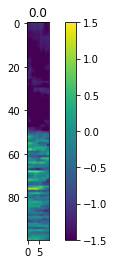

date:180324, rec:001, time:3275.0


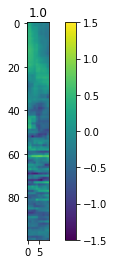

date:180325, rec:007, time:6513.0


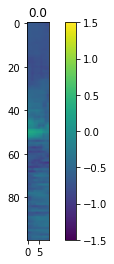

date:180323, rec:002, time:520.0


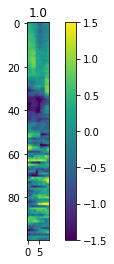

date:180323, rec:002, time:2726.0


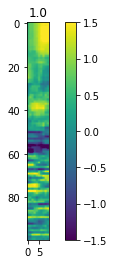

date:180322, rec:005, time:2035.0


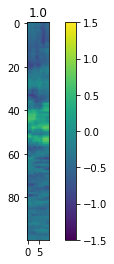

date:180401, rec:001, time:6063.0


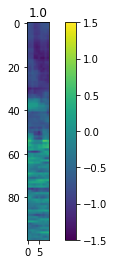

date:180325, rec:002, time:5048.0


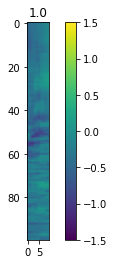

date:180325, rec:001, time:7111.0


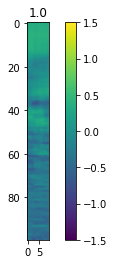

date:180322, rec:002, time:4179.0


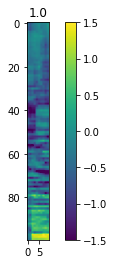

date:180325, rec:002, time:4558.0


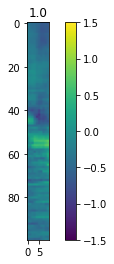

date:180401, rec:001, time:1390.0


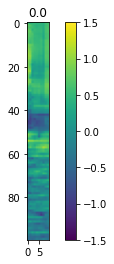

date:180325, rec:002, time:1992.0


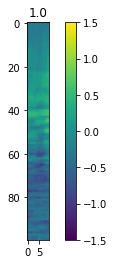

date:180325, rec:007, time:3799.0


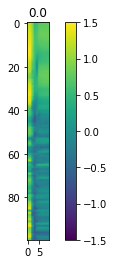

date:180322, rec:004, time:6456.0


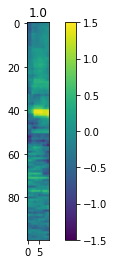

date:180325, rec:009, time:4889.0


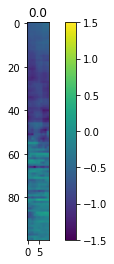

date:180323, rec:007, time:2009.0


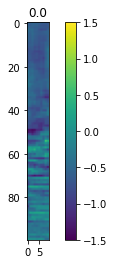

date:180325, rec:009, time:2480.0


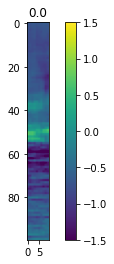

date:180401, rec:001, time:4447.0


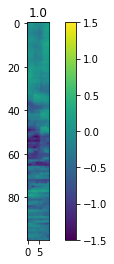

date:180324, rec:009, time:560.0


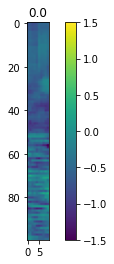

date:180324, rec:003, time:2647.0


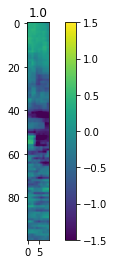

date:180324, rec:009, time:830.0


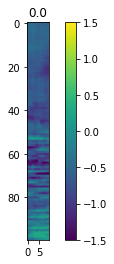

date:180325, rec:001, time:750.0


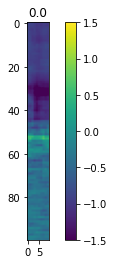

date:180323, rec:007, time:4361.0


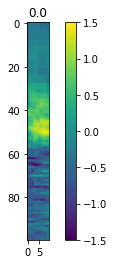

date:180325, rec:007, time:4563.0


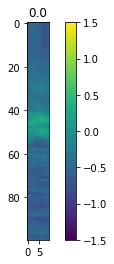

date:180325, rec:006, time:6461.0


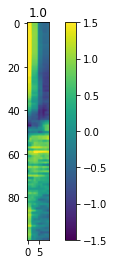

date:180325, rec:002, time:370.0


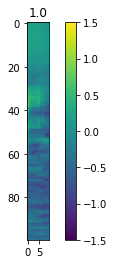

date:180323, rec:007, time:5274.0


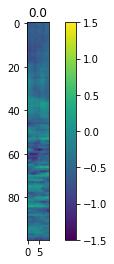

date:180325, rec:003, time:4003.0


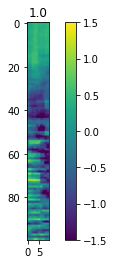

date:180401, rec:001, time:1140.0


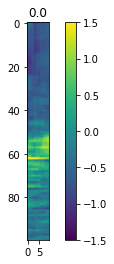

date:180322, rec:007, time:225.0


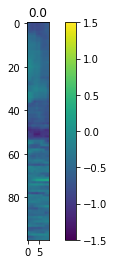

date:180325, rec:004, time:5907.0


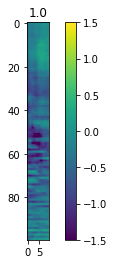

date:180401, rec:001, time:1130.0


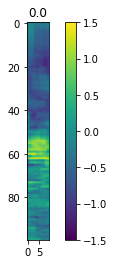

date:180325, rec:003, time:2355.0


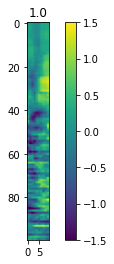

date:180324, rec:008, time:2398.0


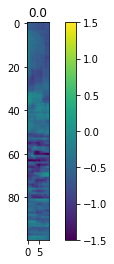

date:180323, rec:007, time:4802.0


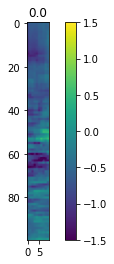

In [20]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}'.format(date[i], rec[i], time[i]))
        data_sub = data[i][0]
        plt.imshow(data_sub)
        plt.clim(-1.5, 1.5)
        plt.colorbar()
        plt.title(label[i][0].numpy())
        plt.show()
    break

### Logistic regression with no regularization

In [28]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha=0
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'

Train loss for epoch 0: 0.541522741317749
Val loss for epoch 0: 0.49350300431251526
Train loss for epoch 1: 0.5149166584014893
Val loss for epoch 1: 0.48275211453437805
1
Train loss for epoch 2: 0.5075355768203735
Val loss for epoch 2: 0.4884290397167206
Train loss for epoch 3: 0.5000057816505432
Val loss for epoch 3: 0.49130937457084656
Train loss for epoch 4: 0.4946843087673187
Val loss for epoch 4: 0.48405906558036804
Train loss for epoch 5: 0.48984742164611816
Val loss for epoch 5: 0.4774949550628662
5
Train loss for epoch 6: 0.48518478870391846
Val loss for epoch 6: 0.48151618242263794
Train loss for epoch 7: 0.48127463459968567
Val loss for epoch 7: 0.4791194796562195
Train loss for epoch 8: 0.4785420298576355
Val loss for epoch 8: 0.48456549644470215
Train loss for epoch 9: 0.4756301939487457
Val loss for epoch 9: 0.47558775544166565
9
Train loss for epoch 10: 0.4721968173980713
Val loss for epoch 10: 0.48124369978904724
Train loss for epoch 11: 0.4694286584854126
Val loss for e

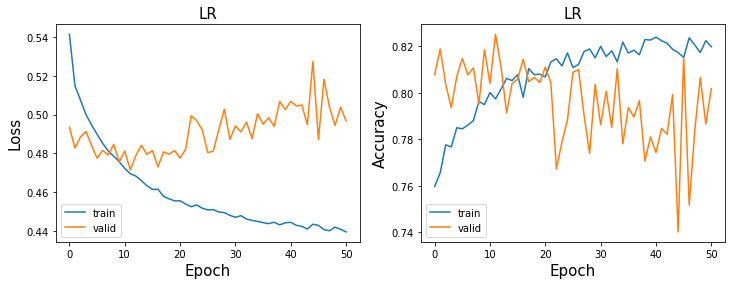

In [22]:

model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)

    if train_loss < tol:
        break
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [30]:
model_LR = os.listdir(model_saving_path)
results = []
alphas = [0]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CH23_' in s and reg_alpha in s and '_valbalanced' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
0         11


/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CH23_LOSSbce_REGnone0_EPOCH11_REDUCEsum_valbalanced.pt


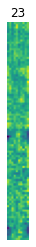

validation loss:0.47143951058387756 accuracy:0.8251670378619154
0.5
test loss:0.6389617323875427 accuracy:0.6900304048647784
0.7385182


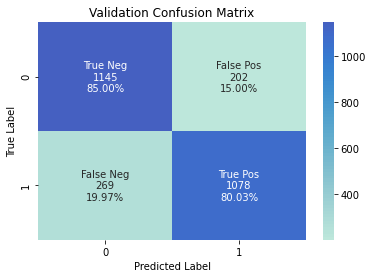

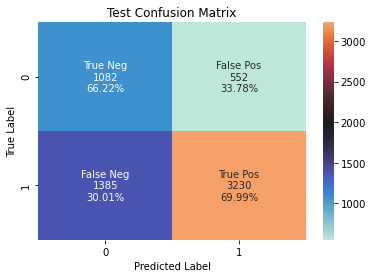

date:180327, rec:006, time:5408.0, label:1.0
Original data 62 CH


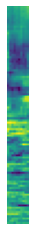

In [31]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, 10)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate validation accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))
    
    ## Confusion matrix-validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()

### Logistic regression with L2 regularization

In [32]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1, 50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'





Train loss for epoch 0: 0.5423733592033386
Val loss for epoch 0: 0.4952559471130371
Train loss for epoch 1: 0.5147227048873901
Val loss for epoch 1: 0.4864097535610199
1
Train loss for epoch 2: 0.5067958235740662
Val loss for epoch 2: 0.4977177083492279
Train loss for epoch 3: 0.5009274482727051
Val loss for epoch 3: 0.5013135075569153
Train loss for epoch 4: 0.49513787031173706
Val loss for epoch 4: 0.4835723638534546
4
Train loss for epoch 5: 0.49085375666618347
Val loss for epoch 5: 0.5019365549087524
Train loss for epoch 6: 0.48815008997917175
Val loss for epoch 6: 0.4782533645629883
6
Train loss for epoch 7: 0.4843143820762634
Val loss for epoch 7: 0.49070045351982117
Train loss for epoch 8: 0.4805399775505066
Val loss for epoch 8: 0.48447683453559875
Train loss for epoch 9: 0.47741270065307617
Val loss for epoch 9: 0.492916077375412
Train loss for epoch 10: 0.4750026762485504
Val loss for epoch 10: 0.48859578371047974
Train loss for epoch 11: 0.47310754656791687
Val loss for epoc

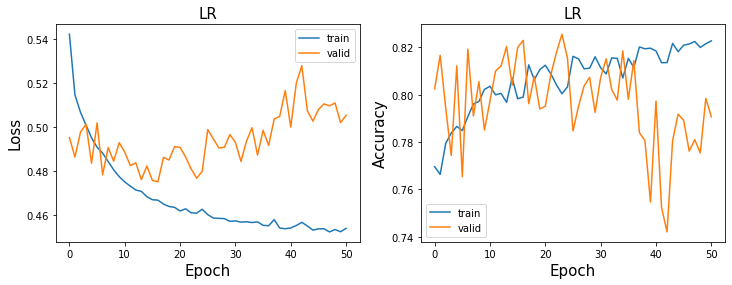

Train loss for epoch 0: 0.6335480809211731
Val loss for epoch 0: 0.5478747487068176
Train loss for epoch 1: 0.5760528445243835
Val loss for epoch 1: 0.534569501876831
1
Train loss for epoch 2: 0.5710927248001099
Val loss for epoch 2: 0.5277881026268005
2
Train loss for epoch 3: 0.567051351070404
Val loss for epoch 3: 0.5319841504096985
Train loss for epoch 4: 0.5646286010742188
Val loss for epoch 4: 0.5267881751060486
4
Train loss for epoch 5: 0.5623902678489685
Val loss for epoch 5: 0.5295014977455139
Train loss for epoch 6: 0.559963047504425
Val loss for epoch 6: 0.5353937745094299
Train loss for epoch 7: 0.5581764578819275
Val loss for epoch 7: 0.5271787047386169
Train loss for epoch 8: 0.557002604007721
Val loss for epoch 8: 0.5179377198219299
8
Train loss for epoch 9: 0.5580485463142395
Val loss for epoch 9: 0.5351052284240723
Train loss for epoch 10: 0.5571160912513733
Val loss for epoch 10: 0.5213462710380554
Train loss for epoch 11: 0.5542832612991333
Val loss for epoch 11: 0.5

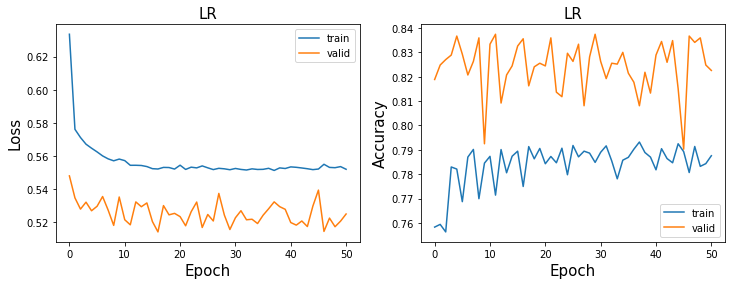

Train loss for epoch 0: 0.6889673471450806
Val loss for epoch 0: 0.5592142939567566
Train loss for epoch 1: 0.6040316820144653
Val loss for epoch 1: 0.5615787506103516
Train loss for epoch 2: 0.6009882688522339
Val loss for epoch 2: 0.5662426948547363
Train loss for epoch 3: 0.597016453742981
Val loss for epoch 3: 0.561784565448761
Train loss for epoch 4: 0.5952015519142151
Val loss for epoch 4: 0.5517778992652893
4
Train loss for epoch 5: 0.5923431515693665
Val loss for epoch 5: 0.5701747536659241
Train loss for epoch 6: 0.5914814472198486
Val loss for epoch 6: 0.5517542362213135
6
Train loss for epoch 7: 0.59111487865448
Val loss for epoch 7: 0.5777102112770081
Train loss for epoch 8: 0.5917539596557617
Val loss for epoch 8: 0.5532358884811401
Train loss for epoch 9: 0.5890616178512573
Val loss for epoch 9: 0.5601294040679932
Train loss for epoch 10: 0.5889277458190918
Val loss for epoch 10: 0.5470788478851318
10
Train loss for epoch 11: 0.5884579420089722
Val loss for epoch 11: 0.55

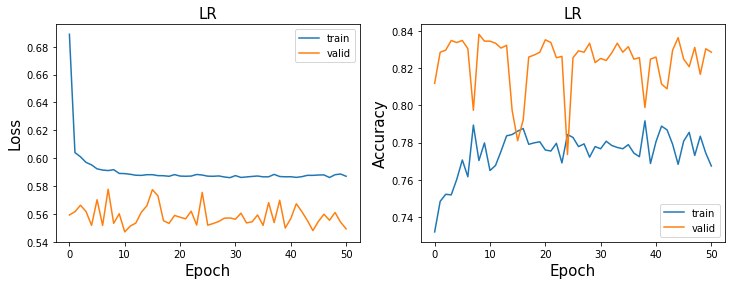

In [24]:
for alpha in alphas:
    model = GLM(input_dim=100*10).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [33]:
model_LR = os.listdir(model_saving_path)
results = []
alphas = [1,50,100]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CH23_' in s and reg_alpha in s and '_valbalanced' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
1         16
50        16
100       10


/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CH23_LOSSbce_REGl21_EPOCH16_REDUCEsum_valbalanced.pt


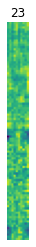

validation loss:0.4750606119632721 accuracy:0.8229398663697105
0.5
test loss:0.6237354278564453 accuracy:0.6996319411105777
0.7385182


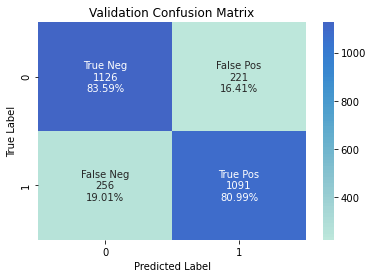

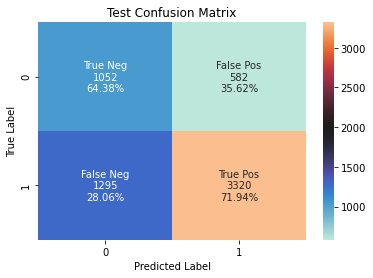

date:180327, rec:006, time:5408.0, label:1.0
Original data 62 CH


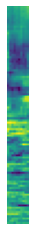

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CH23_LOSSbce_REGl250_EPOCH16_REDUCEsum_valbalanced.pt


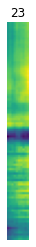

validation loss:0.5139920115470886 accuracy:0.8355605048255382
0.5
test loss:0.6792737245559692 accuracy:0.695791326612258
0.7385182


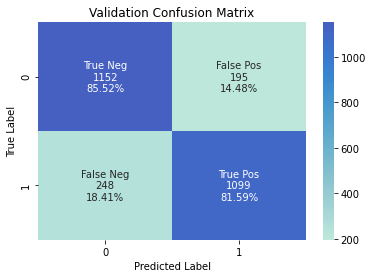

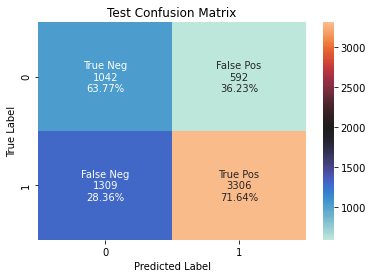

date:180327, rec:006, time:5408.0, label:1.0
Original data 62 CH


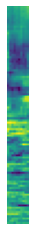

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CH23_LOSSbce_REGl2100_EPOCH10_REDUCEsum_valbalanced.pt


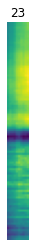

validation loss:0.5470788478851318 accuracy:0.8344469190794358
0.5
test loss:0.7106195092201233 accuracy:0.671627460393663
0.7385182


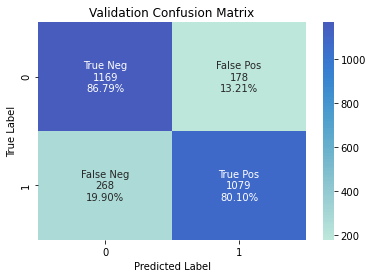

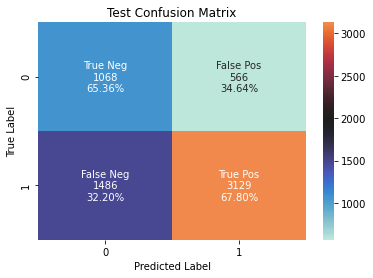

date:180327, rec:006, time:5408.0, label:1.0
Original data 62 CH


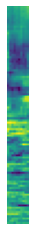

In [34]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, 10)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate validation accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))
    
    ## Confusion matrix-validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()

### Logistic Regression with finite difference regularization

In [36]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'



Train loss for epoch 0: 0.5509668588638306
Val loss for epoch 0: 0.5021612048149109
Train loss for epoch 1: 0.5212234854698181
Val loss for epoch 1: 0.4967460334300995
1
Train loss for epoch 2: 0.5124187469482422
Val loss for epoch 2: 0.49483925104141235
2
Train loss for epoch 3: 0.5063830614089966
Val loss for epoch 3: 0.4927695095539093
3
Train loss for epoch 4: 0.500486433506012
Val loss for epoch 4: 0.4910154640674591
4
Train loss for epoch 5: 0.4958335757255554
Val loss for epoch 5: 0.4834771454334259
5
Train loss for epoch 6: 0.4922739863395691
Val loss for epoch 6: 0.4842918813228607
Train loss for epoch 7: 0.4876471757888794
Val loss for epoch 7: 0.4861607253551483
Train loss for epoch 8: 0.4859400689601898
Val loss for epoch 8: 0.496618390083313
Train loss for epoch 9: 0.4834296405315399
Val loss for epoch 9: 0.4782234728336334
9
Train loss for epoch 10: 0.4806429147720337
Val loss for epoch 10: 0.48427098989486694
Train loss for epoch 11: 0.4797574281692505
Val loss for epoch

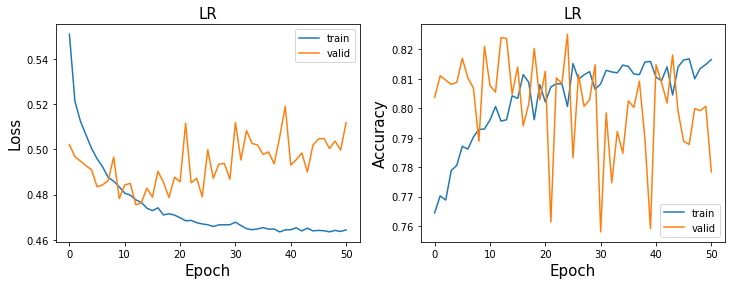

Train loss for epoch 0: 0.6416374444961548
Val loss for epoch 0: 0.5170366764068604
Train loss for epoch 1: 0.5456165671348572
Val loss for epoch 1: 0.5148859620094299
1
Train loss for epoch 2: 0.5427064895629883
Val loss for epoch 2: 0.49986839294433594
2
Train loss for epoch 3: 0.5384026765823364
Val loss for epoch 3: 0.49595093727111816
3
Train loss for epoch 4: 0.5363510251045227
Val loss for epoch 4: 0.5112674832344055
Train loss for epoch 5: 0.5336772799491882
Val loss for epoch 5: 0.4998309910297394
Train loss for epoch 6: 0.5309972167015076
Val loss for epoch 6: 0.49749884009361267
Train loss for epoch 7: 0.5307638645172119
Val loss for epoch 7: 0.48770245909690857
7
Train loss for epoch 8: 0.5279982089996338
Val loss for epoch 8: 0.49994590878486633
Train loss for epoch 9: 0.5270715951919556
Val loss for epoch 9: 0.4922798275947571
Train loss for epoch 10: 0.5253374576568604
Val loss for epoch 10: 0.48796823620796204
Train loss for epoch 11: 0.5258170366287231
Val loss for epo

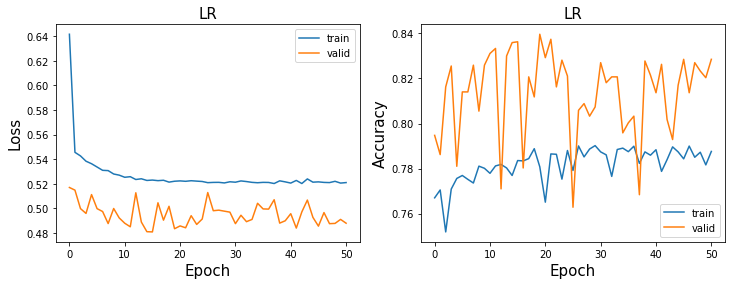

Train loss for epoch 0: 0.7232601046562195
Val loss for epoch 0: 0.5225474238395691
Train loss for epoch 1: 0.5540973544120789
Val loss for epoch 1: 0.5146366953849792
1
Train loss for epoch 2: 0.5515219569206238
Val loss for epoch 2: 0.5133442282676697
2
Train loss for epoch 3: 0.5485694408416748
Val loss for epoch 3: 0.508751630783081
3
Train loss for epoch 4: 0.5466787219047546
Val loss for epoch 4: 0.5088595151901245
Train loss for epoch 5: 0.5445448160171509
Val loss for epoch 5: 0.4994637072086334
5
Train loss for epoch 6: 0.5435838103294373
Val loss for epoch 6: 0.5012410879135132
Train loss for epoch 7: 0.5430423021316528
Val loss for epoch 7: 0.49939265847206116
7
Train loss for epoch 8: 0.5405457019805908
Val loss for epoch 8: 0.5001949071884155
Train loss for epoch 9: 0.5397545099258423
Val loss for epoch 9: 0.4979853630065918
9
Train loss for epoch 10: 0.5385296940803528
Val loss for epoch 10: 0.5050204992294312
Train loss for epoch 11: 0.5384425520896912
Val loss for epoch

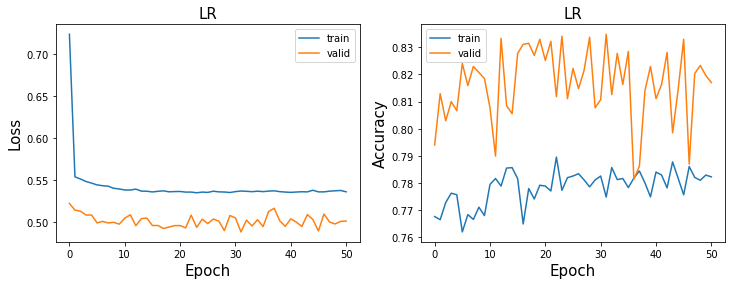

In [26]:
for alpha in alphas:
    model = GLM(input_dim=100*10).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [37]:
model_LR = os.listdir(model_saving_path)
results = []
alphas = [1,50,100]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CH23_' in s and reg_alpha in s and '_valbalanced' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
1         12
50        15
100       31


/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CH23_LOSSbce_REGfinite_diff1_EPOCH12_REDUCEsum_valbalanced.pt


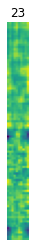

validation loss:0.475498229265213 accuracy:0.8240534521158129
0.5
test loss:0.6136764287948608 accuracy:0.7071531445031205
0.7385182


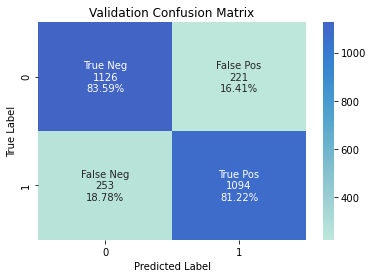

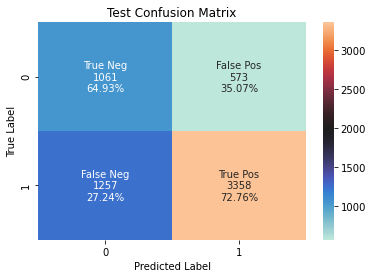

date:180327, rec:006, time:5408.0, label:1.0
Original data 62 CH


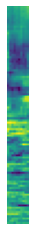

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CH23_LOSSbce_REGfinite_diff50_EPOCH15_REDUCEsum_valbalanced.pt


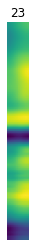

validation loss:0.4809097945690155 accuracy:0.8363028953229399
0.5
test loss:0.6286100745201111 accuracy:0.7204352696431429
0.7385182


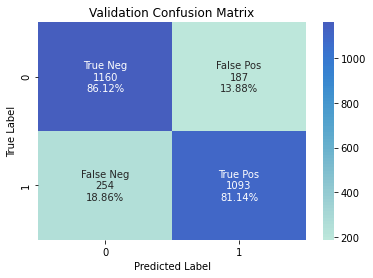

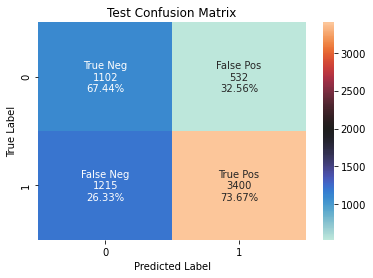

date:180327, rec:006, time:5408.0, label:1.0
Original data 62 CH


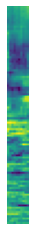

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CH23_LOSSbce_REGfinite_diff100_EPOCH31_REDUCEsum_valbalanced.pt


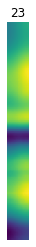

validation loss:0.4887767434120178 accuracy:0.8348181143281366
0.5
test loss:0.6451261043548584 accuracy:0.7173947831653065
0.7385182


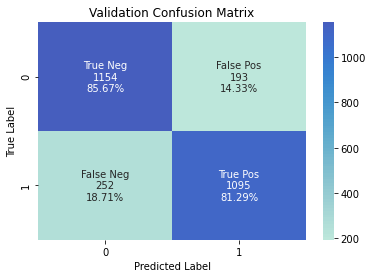

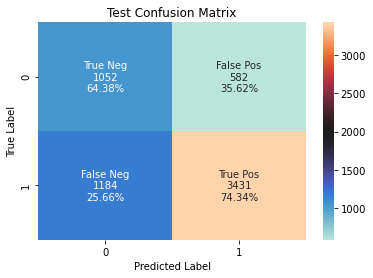

date:180327, rec:006, time:5408.0, label:1.0
Original data 62 CH


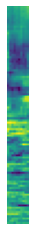

In [38]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, 10)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate validation accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))
    
    ## Confusion matrix-validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()

### SVM without regularization

In [21]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0 
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'none' # expect to be bad, since predictions could be arbitrarily far from boundaries

model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [15]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.5633243322372437
Val loss for epoch 0: 0.6515001654624939
Train loss for epoch 1: 0.5354222655296326
Val loss for epoch 1: 0.6230804324150085
1
Train loss for epoch 2: 0.5250371098518372
Val loss for epoch 2: 0.5986531376838684
2
Train loss for epoch 3: 0.5187399387359619
Val loss for epoch 3: 0.6033577919006348
Train loss for epoch 4: 0.516137421131134
Val loss for epoch 4: 0.6111773252487183
Train loss for epoch 5: 0.5122883915901184
Val loss for epoch 5: 0.5754786133766174
5
Train loss for epoch 6: 0.5103127360343933
Val loss for epoch 6: 0.5845819711685181
Train loss for epoch 7: 0.5089962482452393
Val loss for epoch 7: 0.6389201879501343
Train loss for epoch 8: 0.5068846344947815
Val loss for epoch 8: 0.609408438205719
Train loss for epoch 9: 0.5067763924598694
Val loss for epoch 9: 0.5766943097114563
Train loss for epoch 10: 0.5029414892196655
Val loss for epoch 10: 0.6333111524581909
Train loss for epoch 11: 0.5027903914451599
Val loss for epoch 11: 0.6

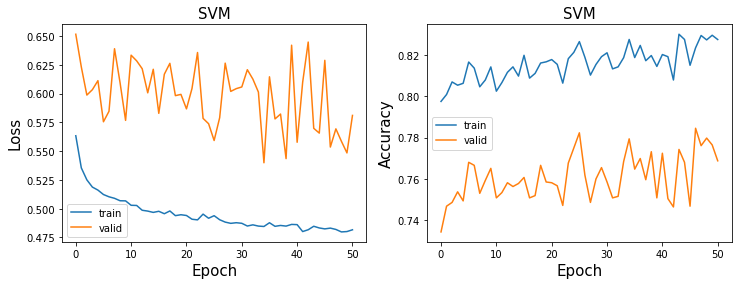

In [16]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [22]:
best_epoch = 34

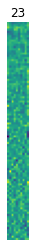

In [23]:
model = GLM(input_dim=100*10).to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, 10)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [24]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_3 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.7474792003631592 accuracy:0.6978461538461539


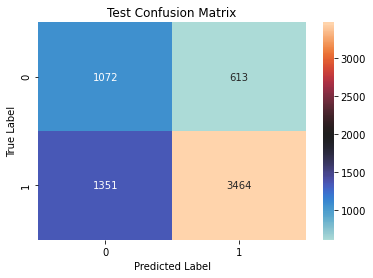

In [25]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:004, time:004, label:1.0
Original data 62 CH


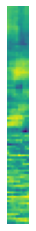

In [26]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_3[0][0], cases_wrong_3[0][1], cases_wrong_3[0][1], cases_wrong_3[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_3[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

### SVM with L2 regularization

### SVM with finite difference regularization